<a href="https://colab.research.google.com/github/InMyDream21/Stunting-Classification/blob/main/Stunting_Classification_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stunting Classification
Machine Learning Final Project

Group:
1. Muhammad Fadhil Musyaffa - 2110511006
2. Jesselyn Mu - 2110511008
3. Ahmed Nizhan Haikal - 2110511022
4. Muhammad Rizki - 2110511042

## Load Data
Sumber Dataset: https://www.kaggle.com/datasets/muhtarom/stunting/

In [1]:
import pandas as pd

data = pd.read_excel('Stunting Dataset.xlsx')
data.head()

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,F,56,2.9,50,11.0,90.0,Yes,No
1,F,20,3.3,49,11.1,80.5,No,No
2,M,4,2.8,48,6.5,63.0,No,No
3,F,14,2.0,49,7.0,71.0,Yes,No
4,M,32,3.2,49,11.0,88.7,Yes,No


Dataset tersebut memiliki 8 atribut sebagai berikut:
1. Jenis Kelamin (F dan M)
2. Umur (dalam bulan)
3. Berat Saat Lahir
4. Tinggi Saat lahir
5. Berat Badan Saat Pengambilan Data
6. Tinggi Badan Saat Pengambilan Data
7. Konsumsi ASI Eksklusif
8. Label Stunting atau Tidak

## EDA (Exploratory Data Analysis)

### Data Visualization

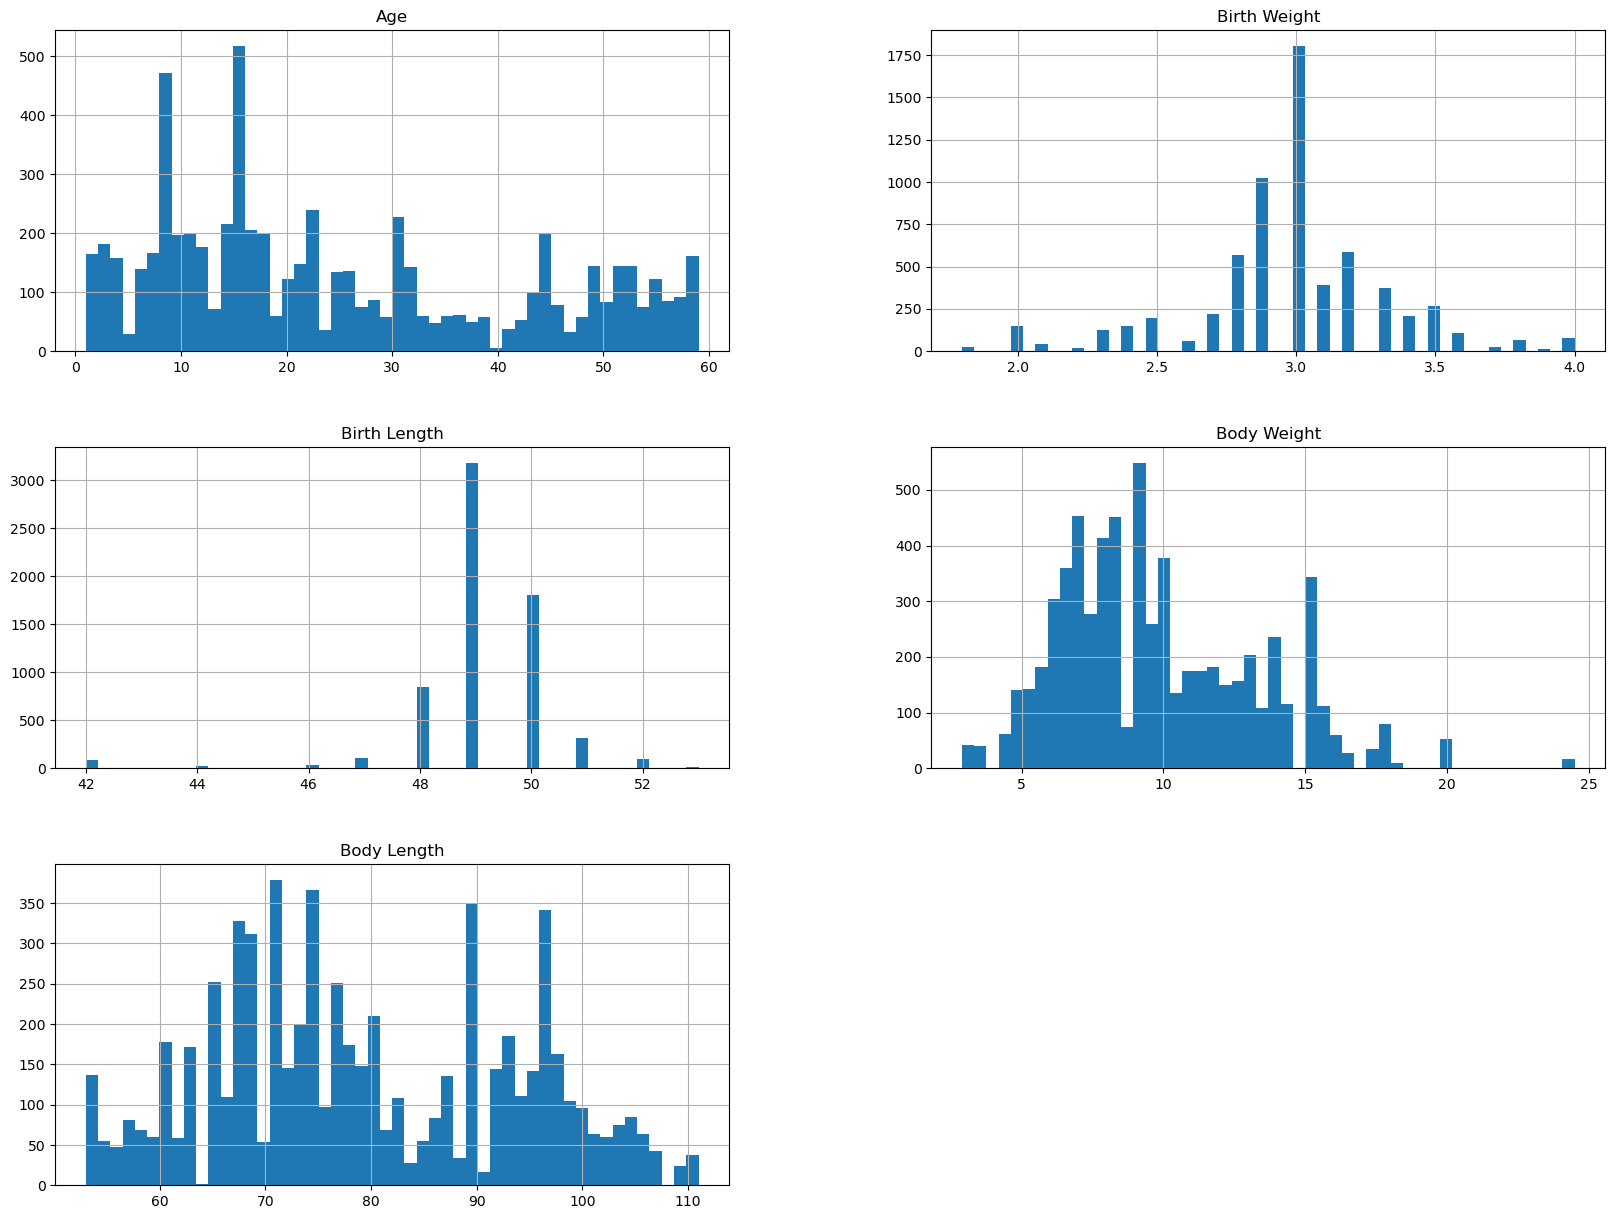

In [2]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20, 15))
plt.show()

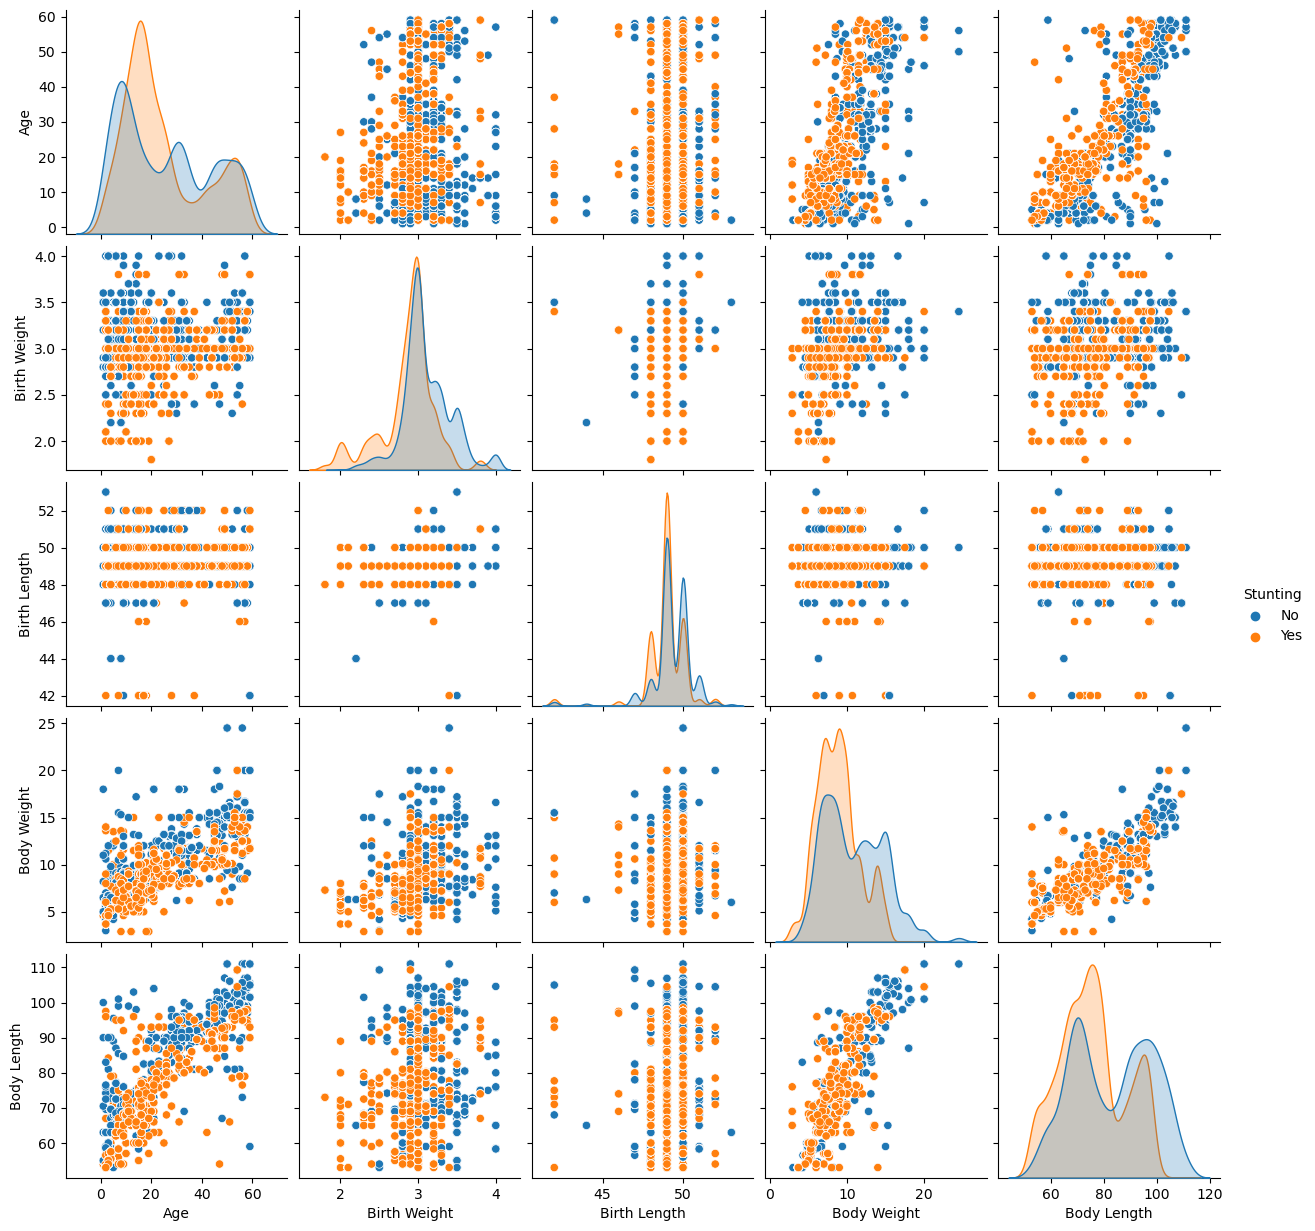

In [3]:
import seaborn as sns

sns.pairplot(data, hue="Stunting")
plt.show()

### Data Preprocessing
- Data Cleansing
- Encode data yang belum bertipe numerik

In [4]:
data.isna().value_counts()

Sex    Age    Birth Weight  Birth Length  Body Weight  Body Length  ASI Eksklusif  Stunting
False  False  False         False         False        False        False          False       6500
Name: count, dtype: int64

Dataset tersebut tidak memiliki *missing value*

In [5]:
data.head()

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,F,56,2.9,50,11.0,90.0,Yes,No
1,F,20,3.3,49,11.1,80.5,No,No
2,M,4,2.8,48,6.5,63.0,No,No
3,F,14,2.0,49,7.0,71.0,Yes,No
4,M,32,3.2,49,11.0,88.7,Yes,No


Encode Data

In [6]:
cat_columns = []
for col in data.columns:
  if data[col].dtype == 'object':
    cat_columns.append(col)

cat_columns

['Sex', 'ASI Eksklusif', 'Stunting']

In [7]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
encoded_data = data.copy()
encoded_data[cat_columns] = enc.fit_transform(encoded_data[cat_columns])
encoded_data.head()

,Sex,Age,Birth Weight,Birth Length,Body Weight,Body Length,ASI Eksklusif,Stunting
0,0.0,56,2.9,50,11.0,90.0,1.0,0.0
1,0.0,20,3.3,49,11.1,80.5,0.0,0.0
2,1.0,4,2.8,48,6.5,63.0,0.0,0.0
3,0.0,14,2.0,49,7.0,71.0,1.0,0.0
4,1.0,32,3.2,49,11.0,88.7,1.0,0.0


## Data Splitting
Dataset tersebut akan di split menjadi 80% untuk training dan 20% untuk testing.

In [8]:
X = encoded_data.iloc[:, :-1].values
y = encoded_data.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(5200, 1300, 5200, 1300)

## Model Building
Model akan dibuat dengan menggunakan algoritma XGBoost.

In [10]:
import xgboost

xgbmodel = xgboost.XGBClassifier()
xgbmodel.fit(X_train, y_train)
y_pred = xgbmodel.predict(X_test)
y_pred[:10]

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 0])

## Evaluasi Model XGBoost

### Pada Data Training

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = xgbmodel.predict(X_train)

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2532
         1.0       1.00      0.99      1.00      2668

    accuracy                           1.00      5200
   macro avg       1.00      1.00      1.00      5200
weighted avg       1.00      1.00      1.00      5200



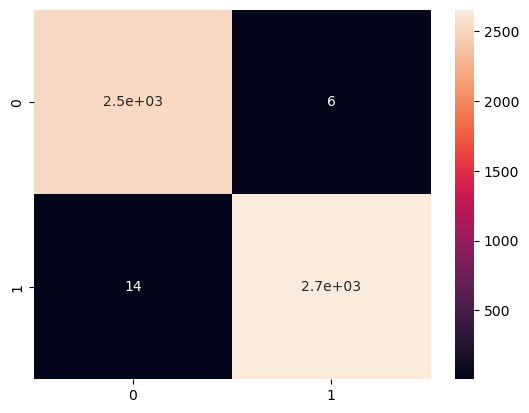

In [12]:
cf_matrix = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

### Pada Data Testing

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       656
         1.0       0.99      0.98      0.98       644

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



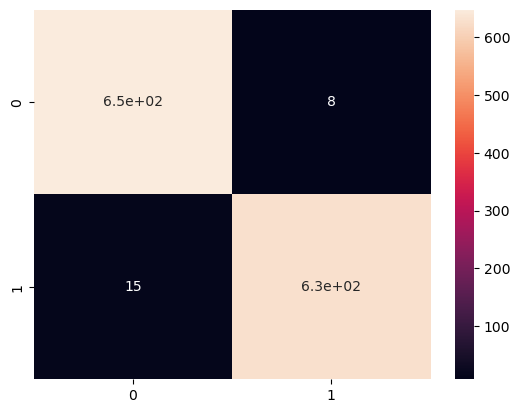

In [14]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

### Analisis Hasil
Model XGBoost mendapatkan hasil yang baik pada data training dengan seluruh skor pada *classification report* yang bernilai sempura atau semua berhasil diprediksi dengan benar. Hal ini juga tercermin pada hasil prediksi dari data testing yang mendapatkan akurasi sebesar 98%, precision sebesar 98%, recall sebesar 98%, dan F1-score sebesar 98% juga. Hasil ini menandakan bahwa algoritma XGBoost dapat digunakan untuk memprediksi stunting menggunakan data yang ada. 